Name: 吳泓毅

Student ID: 0716050

Nov 2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib3
import seaborn as sns

%matplotlib inline

# 1. Data Input
利用pandas的read_csv讀檔，利用';'分隔，並將讀進來的data轉成DataFrame。

In [2]:
data = pd.read_csv("student-mat.csv",sep=';')
df = pd.DataFrame(data=data)

# 2. Data Preprocessing

## Transform data format and shape so your model can process them
因為Mushroom DataFrame中原先的feature內的數值是用string表示，要將其轉換成數字才能執行，而這裡轉換的方式是用get_dummies，把每個features後面加上'\_?'（?表示原先該feature中可能的值），並用1代表True，0代表False。

In [3]:
df = pd.get_dummies(df)
# display use: show all columns
pd.options.display.max_columns = None
display(df)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0
391,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0
393,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0


## Shuffle the data
利用sklearn.utils中的shffle()將資料重排。

In [4]:
from sklearn.utils import shuffle

df = shuffle(df)

## Transform label format so you can do the required two tasks described below Data section

### Binary Classification
加一個新的column叫pass是用來存binary classification後的結果，預設為0，若>=10且<=20則pass=1

In [5]:
df['pass'] = 0
df.loc[(df.G3 >= 10) & (df.G3 <= 20), 'pass'] = 1
df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,pass
228,18,2,1,4,2,0,4,3,2,4,5,3,14,10,8,9,1,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
214,17,4,4,1,1,0,5,2,1,1,2,3,12,8,10,10,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,1
326,17,3,3,1,1,0,4,3,5,3,5,5,3,14,15,16,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1
46,16,3,3,1,2,0,2,3,5,1,4,3,12,11,12,11,1,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,1,0,1
362,18,3,3,2,2,0,4,3,2,1,3,3,0,11,11,10,0,1,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,15,4,2,1,1,0,2,2,4,2,4,1,4,15,16,15,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
167,16,4,2,1,2,0,4,2,3,1,1,3,0,14,15,16,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,1
247,22,3,1,1,1,3,5,4,5,5,5,1,16,6,8,8,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0
233,16,4,4,1,2,0,4,2,4,2,4,1,2,14,13,13,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1


### 5-Level Classification
加一個新的column叫level是用來存5-level classification後的結果，預設為na，若符合條件則分別改成A, B, C, D, F

In [6]:
df['level'] = 'na'
df.loc[(df.G3 >= 16) & (df.G3 <= 20), 'level'] = 'A'
df.loc[(df.G3 >= 14) & (df.G3 <= 15), 'level'] = 'B'
df.loc[(df.G3 >= 12) & (df.G3 <= 13), 'level'] = 'C'
df.loc[(df.G3 >= 10) & (df.G3 <= 11), 'level'] = 'D'
df.loc[(df.G3 >= 0) & (df.G3 <= 9), 'level'] = 'F'
df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,pass,level
228,18,2,1,4,2,0,4,3,2,4,5,3,14,10,8,9,1,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,F
214,17,4,4,1,1,0,5,2,1,1,2,3,12,8,10,10,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,1,D
326,17,3,3,1,1,0,4,3,5,3,5,5,3,14,15,16,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,A
46,16,3,3,1,2,0,2,3,5,1,4,3,12,11,12,11,1,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,1,0,1,D
362,18,3,3,2,2,0,4,3,2,1,3,3,0,11,11,10,0,1,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,1,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,15,4,2,1,1,0,2,2,4,2,4,1,4,15,16,15,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,B
167,16,4,2,1,2,0,4,2,3,1,1,3,0,14,15,16,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,1,A
247,22,3,1,1,1,3,5,4,5,5,5,1,16,6,8,8,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,F
233,16,4,4,1,2,0,4,2,4,2,4,1,2,14,13,13,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,C


Drop掉G3，因為他跟target有直接關係

In [7]:
df = df.drop('G3',axis=1)

# 3. Model Construction

## Decision Tree (ID3)
利用id3中的Id3Estimator建立model

In [60]:
import six
from id3 import Id3Estimator
dt = Id3Estimator()

## Random Forest
利用sklearn.ensemble中的RandomForestClassifier建立model。讓tree的個數分別為20, 50, 100

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=20)
rf2 = RandomForestClassifier(n_estimators=50)
rf3 = RandomForestClassifier(n_estimators=100)

### Difference between K-fold cross-validation and Random Forest

#### K-fold cross-validation: It partitiones the original dataset into k equal-sized subdatasets, and one of them is left to be the validation data, and the rest k-1 datasets are test data. Then cross validate k times for different combinations, and finally construct a model to predict data.

#### Random Forest: construct multiple decision trees at training time, and the final decision is made based on the majority of the trees and is chosen by the random forest.

#### K-fold is a validation method, while random forest is a learning method.

## KNN
利用sklearn.neighbors中的KNeighborsClassifier建立model。讓K分別為1, 5, 15

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=1)
knn2 = KNeighborsClassifier(n_neighbors=5)
knn3 = KNeighborsClassifier(n_neighbors=15)

# 4. Validation

## Holdout Validation

In [11]:
from sklearn.model_selection import train_test_split

### For Binary Classification

#### for Decision Tree & Random Forest (Non-normalized)
pass_X到第57個column，pass_y是第58個column因為是pass，也就是target

In [12]:
pass_X = df.iloc[:,:58]
pass_y = df.iloc[:,58]
pass_X_train, pass_X_test, pass_y_train, pass_y_test = train_test_split(pass_X, pass_y, test_size = 0.3)

#### for KNN (Normalized)
和上面一樣，但X有利用sklearn.preprocessing裡的normalize進行normalize

In [13]:
from sklearn import preprocessing

pass_X = df.iloc[:,:58]
pass_y_norm = df.iloc[:,58]
pass_X_norm = preprocessing.normalize(pass_X)
pass_X_train_norm, pass_X_test_norm, pass_y_train_norm, pass_y_test_norm = train_test_split(pass_X_norm, pass_y_norm, test_size = 0.3)

### For 5-level Classification

#### for Decision Tree & Random Forest (Non-normalized)
level_X到第57個column，level_y是第59個column因為是level，也就是target

In [14]:
level_X = df.iloc[:,:58]
level_y = df.iloc[:,59]
level_X_train, level_X_test, level_y_train, level_y_test = train_test_split(level_X, level_y, test_size = 0.3)

#### for KNN (Normalized)
和上面一樣，但X有利用sklearn.preprocessing裡的normalize進行normalize

In [15]:
level_X = df.iloc[:,:58]
level_y_norm = df.iloc[:,59]
level_X_norm = preprocessing.normalize(level_X)
level_X_train_norm, level_X_test_norm, level_y_train_norm, level_y_test_norm = train_test_split(level_X_norm, level_y_norm, test_size = 0.3)

## K-fold Cross-Validation

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### For Binary Classification

#### for Decision Tree & Random Forest (Non-normalized)
bkf是一個class，n_splits = 3表示K = 3。

bkf.split則是K-Fold class中的function，parameter = pass_X則是對其進行K-Fold。最後在將對應data分別存進pass_X_train_kf, pass_X_test_kf, pass_y_train_kf, pass_y_test_kf。

In [17]:
bkf = KFold(n_splits=3)

pass_X_train_kf = []
pass_X_test_kf = []
pass_y_train_kf = []
pass_y_test_kf = []

for train_index, test_index in bkf.split(pass_X):
    print("TRAIN:", train_index, "TEST:", test_index)
    pass_X_train_kf, pass_X_test_kf = pass_X_train_kf + [pass_X.iloc[train_index]], pass_X_test_kf + [pass_X.iloc[test_index]]
    pass_y_train_kf, pass_y_test_kf = pass_y_train_kf + [pass_y.iloc[train_index]], pass_y_test_kf + [pass_y.iloc[test_index]]

TRAIN: [132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311
 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329
 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347
 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365
 366 367 368 369 370 371 372 373 374 375 376

#### for KNN (Normalized)
bkf是一個class，n_splits = 3表示K = 3。
bkf.split則是K-Fold class中的function，parameter = pass_X_norm則是對其進行K-Fold。最後在將對應data分別存進pass_X_train_kf_norm, pass_X_test_kf_norm, pass_y_train_kf_norm, pass_y_test_kf_norm。

In [18]:
bkf = KFold(n_splits=3)

pass_X_train_kf_norm = []
pass_X_test_kf_norm = []
pass_y_train_kf_norm = []
pass_y_test_kf_norm = []

for train_index, test_index in bkf.split(pass_X_norm):
    print("TRAIN:", train_index, "TEST:", test_index)
    pass_X_train_kf_norm, pass_X_test_kf_norm = pass_X_train_kf_norm + [pass_X_norm[train_index]], pass_X_test_kf_norm + [pass_X_norm[test_index]]
    pass_y_train_kf_norm, pass_y_test_kf_norm = pass_y_train_kf_norm + [pass_y_norm.iloc[train_index]], pass_y_test_kf_norm + [pass_y_norm.iloc[test_index]]

TRAIN: [132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311
 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329
 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347
 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365
 366 367 368 369 370 371 372 373 374 375 376

### For 5-level Classification

#### for Decision Tree & Random Forest (Non-normalized)
lkf是一個class，n_splits = 3表示K = 3。 lkf.split則是K-Fold class中的function，parameter = level_X則是對其進行K-Fold。最後在將對應data分別存進level_X_train_kf, level_X_test_kf, level_y_train_kf, level_y_test_kf。

In [19]:
lkf = KFold(n_splits=3)

level_X_train_kf = []
level_X_test_kf = []
level_y_train_kf = []
level_y_test_kf = []

for train_index, test_index in bkf.split(level_X):
    print("TRAIN:", train_index, "TEST:", test_index)
    level_X_train_kf, level_X_test_kf = level_X_train_kf + [level_X.iloc[train_index]], level_X_test_kf + [level_X.iloc[test_index]]
    level_y_train_kf, level_y_test_kf = level_y_train_kf + [level_y.iloc[train_index]], level_y_test_kf + [level_y.iloc[test_index]]

TRAIN: [132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311
 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329
 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347
 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365
 366 367 368 369 370 371 372 373 374 375 376

#### for KNN (Normalized)
lkf是一個class，n_splits = 3表示K = 3。 lkf.split則是K-Fold class中的function，parameter = level_X_norm則是對其進行K-Fold。最後在將對應data分別存進level_X_train_kf_norm, level_X_test_kf_norm, level_y_train_kf_norm, level_y_test_kf_norm。

In [20]:
lkf = KFold(n_splits=3)

level_X_train_kf_norm = []
level_X_test_kf_norm = []
level_y_train_kf_norm = []
level_y_test_kf_norm = []

for train_index, test_index in bkf.split(level_X_norm):
    print("TRAIN:", train_index, "TEST:", test_index)
    level_X_train_kf_norm, level_X_test_kf_norm = level_X_train_kf_norm + [level_X_norm[train_index]], level_X_test_kf_norm + [level_X_norm[test_index]]
    level_y_train_kf_norm, level_y_test_kf_norm = level_y_train_kf_norm + [level_y_norm.iloc[train_index]], level_y_test_kf_norm + [level_y_norm.iloc[test_index]]

TRAIN: [132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311
 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329
 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347
 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365
 366 367 368 369 370 371 372 373 374 375 376

# 5. Results

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

## For Binary Classification

### Using Holdout Validation
fit()即是將data丟進model中run以訓練model；predict()則是使用訓練好的model dt進行預測，並將結果存於pass_y_pred。

利用confusion_matrix()算出confusion matrix，利用accuracy_score算出accuracy，利用recall_score算出recall，利用precision_score算出precision。

利用classification_report算出每個數值及平均。

#### ID3 Decision Tree

In [22]:
dt = dt.fit(pass_X_train, pass_y_train)

pass_y_pred = dt.predict(pass_X_test)

pass_cm = confusion_matrix(pass_y_test, pass_y_pred)
print('Confusion matrix\n', pass_cm)

print('Accuracy: %.4f' % accuracy_score(pass_y_test, pass_y_pred))
print('Sensitivity(Recall):', recall_score(pass_y_test, pass_y_pred, average = None))
print('Precision:', precision_score(pass_y_test, pass_y_pred, average = None))

print(classification_report(pass_y_test, pass_y_pred))

Confusion matrix
 [[31  9]
 [ 5 74]]
Accuracy: 0.8824
Sensitivity(Recall): [0.775      0.93670886]
Precision: [0.86111111 0.89156627]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        40
           1       0.89      0.94      0.91        79

    accuracy                           0.88       119
   macro avg       0.88      0.86      0.86       119
weighted avg       0.88      0.88      0.88       119



#### Random Forest

##### 20 trees

In [23]:
rf1.fit(pass_X_train, pass_y_train)

pass_y_pred = rf1.predict(pass_X_test)

pass_cm = confusion_matrix(pass_y_test, pass_y_pred)
print('Confusion matrix\n', pass_cm)

print('Accuracy: %.4f' % accuracy_score(pass_y_test, pass_y_pred))
print('Sensitivity(Recall):', recall_score(pass_y_test, pass_y_pred, average = None))
print('Precision:', precision_score(pass_y_test, pass_y_pred, average = None))

print(classification_report(pass_y_test, pass_y_pred))

Confusion matrix
 [[33  7]
 [ 6 73]]
Accuracy: 0.8908
Sensitivity(Recall): [0.825      0.92405063]
Precision: [0.84615385 0.9125    ]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        40
           1       0.91      0.92      0.92        79

    accuracy                           0.89       119
   macro avg       0.88      0.87      0.88       119
weighted avg       0.89      0.89      0.89       119



##### 50 trees

In [24]:
rf2.fit(pass_X_train, pass_y_train)

pass_y_pred = rf2.predict(pass_X_test)

pass_cm = confusion_matrix(pass_y_test, pass_y_pred)
print('Confusion matrix\n', pass_cm)

print('Accuracy: %.4f' % accuracy_score(pass_y_test, pass_y_pred))
print('Sensitivity(Recall):', recall_score(pass_y_test, pass_y_pred, average = None))
print('Precision:', precision_score(pass_y_test, pass_y_pred, average = None))

print(classification_report(pass_y_test, pass_y_pred))

Confusion matrix
 [[30 10]
 [ 3 76]]
Accuracy: 0.8908
Sensitivity(Recall): [0.75       0.96202532]
Precision: [0.90909091 0.88372093]
              precision    recall  f1-score   support

           0       0.91      0.75      0.82        40
           1       0.88      0.96      0.92        79

    accuracy                           0.89       119
   macro avg       0.90      0.86      0.87       119
weighted avg       0.89      0.89      0.89       119



##### 100 trees

In [25]:
rf3.fit(pass_X_train, pass_y_train)

pass_y_pred = rf3.predict(pass_X_test)

pass_cm = confusion_matrix(pass_y_test, pass_y_pred)
print('Confusion matrix\n', pass_cm)

print('Accuracy: %.4f' % accuracy_score(pass_y_test, pass_y_pred))
print('Sensitivity(Recall):', recall_score(pass_y_test, pass_y_pred, average = None))
print('Precision:', precision_score(pass_y_test, pass_y_pred, average = None))

print(classification_report(pass_y_test, pass_y_pred))

Confusion matrix
 [[30 10]
 [ 4 75]]
Accuracy: 0.8824
Sensitivity(Recall): [0.75       0.94936709]
Precision: [0.88235294 0.88235294]
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        40
           1       0.88      0.95      0.91        79

    accuracy                           0.88       119
   macro avg       0.88      0.85      0.86       119
weighted avg       0.88      0.88      0.88       119



#### KNN

##### K = 1

In [26]:
knn1.fit(pass_X_train_norm, pass_y_train_norm)

pass_y_pred_norm = knn1.predict(pass_X_test_norm)

pass_cm = confusion_matrix(pass_y_test_norm, pass_y_pred_norm)
print('Confusion matrix\n', pass_cm)

print('Accuracy: %.4f' % accuracy_score(pass_y_test_norm, pass_y_pred_norm))
print('Sensitivity(Recall):', recall_score(pass_y_test_norm, pass_y_pred_norm, average = None))
print('Precision:', precision_score(pass_y_test_norm, pass_y_pred_norm, average = None))

print(classification_report(pass_y_test_norm, pass_y_pred_norm))

Confusion matrix
 [[35 10]
 [ 8 66]]
Accuracy: 0.8487
Sensitivity(Recall): [0.77777778 0.89189189]
Precision: [0.81395349 0.86842105]
              precision    recall  f1-score   support

           0       0.81      0.78      0.80        45
           1       0.87      0.89      0.88        74

    accuracy                           0.85       119
   macro avg       0.84      0.83      0.84       119
weighted avg       0.85      0.85      0.85       119



##### K = 5

In [27]:
knn2.fit(pass_X_train_norm, pass_y_train_norm)

pass_y_pred_norm = knn2.predict(pass_X_test_norm)

pass_cm = confusion_matrix(pass_y_test_norm, pass_y_pred_norm)
print('Confusion matrix\n', pass_cm)

print('Accuracy: %.4f' % accuracy_score(pass_y_test_norm, pass_y_pred_norm))
print('Sensitivity(Recall):', recall_score(pass_y_test_norm, pass_y_pred_norm, average = None))
print('Precision:', precision_score(pass_y_test_norm, pass_y_pred_norm, average = None))

print(classification_report(pass_y_test_norm, pass_y_pred_norm))

Confusion matrix
 [[37  8]
 [ 2 72]]
Accuracy: 0.9160
Sensitivity(Recall): [0.82222222 0.97297297]
Precision: [0.94871795 0.9       ]
              precision    recall  f1-score   support

           0       0.95      0.82      0.88        45
           1       0.90      0.97      0.94        74

    accuracy                           0.92       119
   macro avg       0.92      0.90      0.91       119
weighted avg       0.92      0.92      0.91       119



##### K = 15

In [28]:
knn3.fit(pass_X_train_norm, pass_y_train_norm)

pass_y_pred_norm = knn3.predict(pass_X_test_norm)

pass_cm = confusion_matrix(pass_y_test_norm, pass_y_pred_norm)
print('Confusion matrix\n', pass_cm)

print('Accuracy: %.4f' % accuracy_score(pass_y_test_norm, pass_y_pred_norm))
print('Sensitivity(Recall):', recall_score(pass_y_test_norm, pass_y_pred_norm, average = None))
print('Precision:', precision_score(pass_y_test_norm, pass_y_pred_norm, average = None))

print(classification_report(pass_y_test_norm, pass_y_pred_norm))

Confusion matrix
 [[37  8]
 [ 1 73]]
Accuracy: 0.9244
Sensitivity(Recall): [0.82222222 0.98648649]
Precision: [0.97368421 0.90123457]
              precision    recall  f1-score   support

           0       0.97      0.82      0.89        45
           1       0.90      0.99      0.94        74

    accuracy                           0.92       119
   macro avg       0.94      0.90      0.92       119
weighted avg       0.93      0.92      0.92       119



### Using K-fold Cross-Validation
與Holdout validation不同處在於training data及test data有多種不同組合，所以算出每種組合的score後再將其平均。

另外，利用cross_val_predict可以運用其預設的K-Fold方式得到prediction result，再將其利用classification report計算出各個score及平均。

#### ID3 Decision Tree

In [29]:
pass_accuracy = []
pass_recall = []
pass_precision = []

print('Confusion matrix')

for i in range(3):
    dt = dt.fit(pass_X_train_kf[i], pass_y_train_kf[i])

    pass_y_pred_kf = dt.predict(pass_X_test_kf[i])

    pass_cm_kf = confusion_matrix(pass_y_test_kf[i], pass_y_pred_kf)
    print(pass_cm_kf, '\n')

    pass_accuracy += [accuracy_score(pass_y_test_kf[i], pass_y_pred_kf)]
    pass_recall += [recall_score(pass_y_test_kf[i], pass_y_pred_kf, average = None)]
    pass_precision += [precision_score(pass_y_test_kf[i], pass_y_pred_kf, average = None)]
    
print('Accuracy: %.4f' % np.mean(pass_accuracy))
print('Sensitivity(Recall): %.4f' % np.mean(pass_recall))
print('Precision: %.4f' % np.mean(pass_precision))
    
pass_preds = cross_val_predict(dt, pass_X, pass_y, cv=3)
print(classification_report(pass_y, pass_preds))

Confusion matrix
[[32 11]
 [ 5 84]] 

[[30  8]
 [ 4 90]] 

[[39 10]
 [ 8 74]] 

Accuracy: 0.8835
Sensitivity(Recall): 0.8555
Precision: 0.8768
              precision    recall  f1-score   support

           0       0.86      0.78      0.81       130
           1       0.90      0.94      0.92       265

    accuracy                           0.88       395
   macro avg       0.88      0.86      0.86       395
weighted avg       0.88      0.88      0.88       395



#### Random Forest

##### 20 trees

In [30]:
pass_accuracy = []
pass_recall = []
pass_precision = []

print('Confusion matrix')

for i in range(3):
    rf1.fit(pass_X_train_kf[i], pass_y_train_kf[i])

    pass_y_pred_kf = rf1.predict(pass_X_test_kf[i])

    pass_cm_kf = confusion_matrix(pass_y_test_kf[i], pass_y_pred_kf)
    print(pass_cm_kf, '\n')

    pass_accuracy += [accuracy_score(pass_y_test_kf[i], pass_y_pred_kf)]
    pass_recall += [recall_score(pass_y_test_kf[i], pass_y_pred_kf, average = None)]
    pass_precision += [precision_score(pass_y_test_kf[i], pass_y_pred_kf, average = None)]
    
print('Accuracy: %.4f' % np.mean(pass_accuracy))
print('Sensitivity(Recall): %.4f' % np.mean(pass_recall))
print('Precision: %.4f' % np.mean(pass_precision))
    
pass_preds = cross_val_predict(rf1, pass_X, pass_y, cv=3)
print(classification_report(pass_y, pass_preds))

Confusion matrix
[[39  4]
 [ 3 86]] 

[[35  3]
 [11 83]] 

[[42  7]
 [ 8 74]] 

Accuracy: 0.9088
Sensitivity(Recall): 0.9061
Precision: 0.8939
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       130
           1       0.95      0.91      0.93       265

    accuracy                           0.90       395
   macro avg       0.89      0.90      0.89       395
weighted avg       0.91      0.90      0.90       395



##### 50 trees

In [31]:
pass_accuracy = []
pass_recall = []
pass_precision = []

print('Confusion matrix')

for i in range(3):
    rf2.fit(pass_X_train_kf[i], pass_y_train_kf[i])

    pass_y_pred_kf = rf2.predict(pass_X_test_kf[i])

    pass_cm_kf = confusion_matrix(pass_y_test_kf[i], pass_y_pred_kf)
    print(pass_cm_kf, '\n')

    pass_accuracy += [accuracy_score(pass_y_test_kf[i], pass_y_pred_kf)]
    pass_recall += [recall_score(pass_y_test_kf[i], pass_y_pred_kf, average = None)]
    pass_precision += [precision_score(pass_y_test_kf[i], pass_y_pred_kf, average = None)]
    
print('Accuracy: %.4f' % np.mean(pass_accuracy))
print('Sensitivity(Recall): %.4f' % np.mean(pass_recall))
print('Precision: %.4f' % np.mean(pass_precision))
    
pass_preds = cross_val_predict(rf2, pass_X, pass_y, cv=3)
print(classification_report(pass_y, pass_preds))

Confusion matrix
[[37  6]
 [ 6 83]] 

[[33  5]
 [ 6 88]] 

[[44  5]
 [ 9 73]] 

Accuracy: 0.9063
Sensitivity(Recall): 0.8976
Precision: 0.8919
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       130
           1       0.93      0.93      0.93       265

    accuracy                           0.91       395
   macro avg       0.89      0.89      0.89       395
weighted avg       0.91      0.91      0.91       395



##### 100 trees

In [32]:
pass_accuracy = []
pass_recall = []
pass_precision = []

print('Confusion matrix')

for i in range(3):
    rf3.fit(pass_X_train_kf[i], pass_y_train_kf[i])

    pass_y_pred_kf = rf3.predict(pass_X_test_kf[i])

    pass_cm_kf = confusion_matrix(pass_y_test_kf[i], pass_y_pred_kf)
    print(pass_cm_kf, '\n')

    pass_accuracy += [accuracy_score(pass_y_test_kf[i], pass_y_pred_kf)]
    pass_recall += [recall_score(pass_y_test_kf[i], pass_y_pred_kf, average = None)]
    pass_precision += [precision_score(pass_y_test_kf[i], pass_y_pred_kf, average = None)]
    
print('Accuracy: %.4f' % np.mean(pass_accuracy))
print('Sensitivity(Recall): %.4f' % np.mean(pass_recall))
print('Precision: %.4f' % np.mean(pass_precision))
    
pass_preds = cross_val_predict(rf3, pass_X, pass_y, cv=3)
print(classification_report(pass_y, pass_preds))

Confusion matrix
[[35  8]
 [ 5 84]] 

[[34  4]
 [ 6 88]] 

[[44  5]
 [ 7 75]] 

Accuracy: 0.9114
Sensitivity(Recall): 0.9002
Precision: 0.8991
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       130
           1       0.93      0.91      0.92       265

    accuracy                           0.89       395
   macro avg       0.88      0.88      0.88       395
weighted avg       0.89      0.89      0.89       395



#### KNN

##### K = 1

In [33]:
pass_accuracy_norm = []
pass_recall_norm = []
pass_precision_norm = []

print('Confusion matrix')

for i in range(3):
    knn1.fit(pass_X_train_kf_norm[i], pass_y_train_kf_norm[i])
    pass_y_pred_kf_norm = knn1.predict(pass_X_test_kf_norm[i])

    pass_cm_kf = confusion_matrix(pass_y_test_kf_norm[i], pass_y_pred_kf_norm)
    print(pass_cm_kf, '\n')

    pass_accuracy_norm += [accuracy_score(pass_y_test_kf_norm[i], pass_y_pred_kf_norm)]
    pass_recall_norm += [recall_score(pass_y_test_kf_norm[i], pass_y_pred_kf_norm, average = None)]
    pass_precision_norm += [precision_score(pass_y_test_kf_norm[i], pass_y_pred_kf_norm, average = None)]
    
print('Accuracy: %.4f' % np.mean(pass_accuracy_norm))
print('Sensitivity(Recall): %.4f' % np.mean(pass_recall_norm))
print('Precision: %.4f' % np.mean(pass_precision_norm))
    
pass_preds_norm = cross_val_predict(knn1, pass_X_norm, pass_y_norm, cv=3)
print(classification_report(pass_y_norm, pass_preds_norm))

Confusion matrix
[[36  7]
 [11 78]] 

[[24 14]
 [ 8 86]] 

[[37 12]
 [12 70]] 

Accuracy: 0.8379
Sensitivity(Recall): 0.8115
Precision: 0.8171
              precision    recall  f1-score   support

           0       0.76      0.75      0.75       130
           1       0.88      0.89      0.88       265

    accuracy                           0.84       395
   macro avg       0.82      0.82      0.82       395
weighted avg       0.84      0.84      0.84       395



##### K = 5

In [34]:
pass_accuracy_norm = []
pass_recall_norm = []
pass_precision_norm = []

print('Confusion matrix')

for i in range(3):
    knn2.fit(pass_X_train_kf_norm[i], pass_y_train_kf_norm[i])

    pass_y_pred_kf_norm = knn2.predict(pass_X_test_kf_norm[i])

    pass_cm_kf = confusion_matrix(pass_y_test_kf_norm[i], pass_y_pred_kf_norm)
    print(pass_cm_kf, '\n')

    pass_accuracy_norm += [accuracy_score(pass_y_test_kf_norm[i], pass_y_pred_kf_norm)]
    pass_recall_norm += [recall_score(pass_y_test_kf_norm[i], pass_y_pred_kf_norm, average = None)]
    pass_precision_norm += [precision_score(pass_y_test_kf_norm[i], pass_y_pred_kf_norm, average = None)]
    
print('Accuracy: %.4f' % np.mean(pass_accuracy_norm))
print('Sensitivity(Recall): %.4f' % np.mean(pass_recall_norm))
print('Precision: %.4f' % np.mean(pass_precision_norm))
    
pass_preds_norm = cross_val_predict(knn2, pass_X_norm, pass_y_norm, cv=3)
print(classification_report(pass_y_norm, pass_preds_norm))

Confusion matrix
[[29 14]
 [ 6 83]] 

[[28 10]
 [ 3 91]] 

[[38 11]
 [ 6 76]] 

Accuracy: 0.8734
Sensitivity(Recall): 0.8357
Precision: 0.8709
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       130
           1       0.88      0.95      0.91       265

    accuracy                           0.88       395
   macro avg       0.88      0.84      0.86       395
weighted avg       0.88      0.88      0.88       395



##### K = 15

In [35]:
pass_accuracy_norm = []
pass_recall_norm = []
pass_precision_norm = []

print('Confusion matrix')

for i in range(3):
    knn3.fit(pass_X_train_kf_norm[i], pass_y_train_kf_norm[i])

    pass_y_pred_kf_norm = knn3.predict(pass_X_test_kf_norm[i])

    pass_cm_kf = confusion_matrix(pass_y_test_kf_norm[i], pass_y_pred_kf_norm)
    print(pass_cm_kf, '\n')

    pass_accuracy_norm += [accuracy_score(pass_y_test_kf_norm[i], pass_y_pred_kf_norm)]
    pass_recall_norm += [recall_score(pass_y_test_kf_norm[i], pass_y_pred_kf_norm, average = None)]
    pass_precision_norm += [precision_score(pass_y_test_kf_norm[i], pass_y_pred_kf_norm, average = None)]
    
print('Accuracy: %.4f' % np.mean(pass_accuracy_norm))
print('Sensitivity(Recall): %.4f' % np.mean(pass_recall_norm))
print('Precision: %.4f' % np.mean(pass_precision_norm))
    
pass_preds_norm = cross_val_predict(knn3, pass_X_norm, pass_y_norm, cv=3)
print(classification_report(pass_y_norm, pass_preds_norm))

Confusion matrix
[[31 12]
 [ 3 86]] 

[[27 11]
 [ 5 89]] 

[[38 11]
 [ 5 77]] 

Accuracy: 0.8810
Sensitivity(Recall): 0.8432
Precision: 0.8803
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       130
           1       0.88      0.96      0.92       265

    accuracy                           0.89       395
   macro avg       0.89      0.85      0.86       395
weighted avg       0.89      0.89      0.88       395



## For 5-level Classification

### Using Holdout Validation

#### ID3 Decision Tree

In [36]:
dt = dt.fit(level_X_train, level_y_train)

level_y_pred = dt.predict(level_X_test)

level_cm = confusion_matrix(level_y_test, level_y_pred)
print('Confusion matrix\n', level_cm)

print('Accuracy: %.4f' % accuracy_score(level_y_test, level_y_pred))
print('Sensitivity(Recall):', recall_score(level_y_test, level_y_pred, average = None))
print('Precision:', precision_score(level_y_test, level_y_pred, average = None))

print(classification_report(level_y_test, level_y_pred))

Confusion matrix
 [[ 3  7  0  1  0]
 [ 4  4  7  3  0]
 [ 1  4  9  7  0]
 [ 0  2  2 16 13]
 [ 0  0  1 12 23]]
Accuracy: 0.4622
Sensitivity(Recall): [0.27272727 0.22222222 0.42857143 0.48484848 0.63888889]
Precision: [0.375      0.23529412 0.47368421 0.41025641 0.63888889]
              precision    recall  f1-score   support

           A       0.38      0.27      0.32        11
           B       0.24      0.22      0.23        18
           C       0.47      0.43      0.45        21
           D       0.41      0.48      0.44        33
           F       0.64      0.64      0.64        36

    accuracy                           0.46       119
   macro avg       0.43      0.41      0.42       119
weighted avg       0.46      0.46      0.46       119



#### Random Forest

##### 20 trees

In [37]:
rf1.fit(level_X_train, level_y_train)

level_y_pred = rf1.predict(level_X_test)

level_cm = confusion_matrix(level_y_test, level_y_pred)
print('Confusion matrix\n', level_cm)

print('Accuracy: %.4f' % accuracy_score(level_y_test, level_y_pred))
print('Sensitivity(Recall):', recall_score(level_y_test, level_y_pred, average = None))
print('Precision:', precision_score(level_y_test, level_y_pred, average = None))

print(classification_report(level_y_test, level_y_pred))

Confusion matrix
 [[ 5  5  0  1  0]
 [ 2 12  2  2  0]
 [ 0  5  5  9  2]
 [ 0  1  1 18 13]
 [ 0  0  0  4 32]]
Accuracy: 0.6050
Sensitivity(Recall): [0.45454545 0.66666667 0.23809524 0.54545455 0.88888889]
Precision: [0.71428571 0.52173913 0.625      0.52941176 0.68085106]
              precision    recall  f1-score   support

           A       0.71      0.45      0.56        11
           B       0.52      0.67      0.59        18
           C       0.62      0.24      0.34        21
           D       0.53      0.55      0.54        33
           F       0.68      0.89      0.77        36

    accuracy                           0.61       119
   macro avg       0.61      0.56      0.56       119
weighted avg       0.61      0.61      0.58       119



##### 50 trees

In [38]:
rf2.fit(level_X_train, level_y_train)

level_y_pred = rf2.predict(level_X_test)

level_cm = confusion_matrix(level_y_test, level_y_pred)
print('Confusion matrix\n', level_cm)

print('Accuracy: %.4f' % accuracy_score(level_y_test, level_y_pred))
print('Sensitivity(Recall):', recall_score(level_y_test, level_y_pred, average = None))
print('Precision:', precision_score(level_y_test, level_y_pred, average = None))

print(classification_report(level_y_test, level_y_pred))

Confusion matrix
 [[ 7  4  0  0  0]
 [ 2 14  2  0  0]
 [ 0  1 10  9  1]
 [ 0  0  2 19 12]
 [ 0  0  0  4 32]]
Accuracy: 0.6891
Sensitivity(Recall): [0.63636364 0.77777778 0.47619048 0.57575758 0.88888889]
Precision: [0.77777778 0.73684211 0.71428571 0.59375    0.71111111]
              precision    recall  f1-score   support

           A       0.78      0.64      0.70        11
           B       0.74      0.78      0.76        18
           C       0.71      0.48      0.57        21
           D       0.59      0.58      0.58        33
           F       0.71      0.89      0.79        36

    accuracy                           0.69       119
   macro avg       0.71      0.67      0.68       119
weighted avg       0.69      0.69      0.68       119



##### 100 trees

In [39]:
rf3.fit(level_X_train, level_y_train)

level_y_pred = rf3.predict(level_X_test)

level_cm = confusion_matrix(level_y_test, level_y_pred)
print('Confusion matrix\n', level_cm)

print('Accuracy: %.4f' % accuracy_score(level_y_test, level_y_pred))
print('Sensitivity(Recall):', recall_score(level_y_test, level_y_pred, average = None))
print('Precision:', precision_score(level_y_test, level_y_pred, average = None))

print(classification_report(level_y_test, level_y_pred))

Confusion matrix
 [[ 5  6  0  0  0]
 [ 1 12  5  0  0]
 [ 0  2  5 12  2]
 [ 0  0  2 19 12]
 [ 0  0  0  3 33]]
Accuracy: 0.6218
Sensitivity(Recall): [0.45454545 0.66666667 0.23809524 0.57575758 0.91666667]
Precision: [0.83333333 0.6        0.41666667 0.55882353 0.70212766]
              precision    recall  f1-score   support

           A       0.83      0.45      0.59        11
           B       0.60      0.67      0.63        18
           C       0.42      0.24      0.30        21
           D       0.56      0.58      0.57        33
           F       0.70      0.92      0.80        36

    accuracy                           0.62       119
   macro avg       0.62      0.57      0.58       119
weighted avg       0.61      0.62      0.60       119



#### KNN

##### K = 1

In [40]:
knn1.fit(level_X_train_norm, level_y_train_norm)

level_y_pred_norm = knn1.predict(level_X_test_norm)

level_cm = confusion_matrix(level_y_test_norm, level_y_pred_norm)
print('Confusion matrix\n', level_cm)

print('Accuracy: %.4f' % accuracy_score(level_y_test_norm, level_y_pred_norm))
print('Sensitivity(Recall):', recall_score(level_y_test_norm, level_y_pred_norm, average = None))
print('Precision:', precision_score(level_y_test_norm, level_y_pred_norm, average = None))

print(classification_report(level_y_test_norm, level_y_pred_norm))

Confusion matrix
 [[11  3  0  0  0]
 [ 9  6  7  0  0]
 [ 2  7  2  2  0]
 [ 0  3  7 13  9]
 [ 0  0  1  9 28]]
Accuracy: 0.5042
Sensitivity(Recall): [0.78571429 0.27272727 0.15384615 0.40625    0.73684211]
Precision: [0.5        0.31578947 0.11764706 0.54166667 0.75675676]
              precision    recall  f1-score   support

           A       0.50      0.79      0.61        14
           B       0.32      0.27      0.29        22
           C       0.12      0.15      0.13        13
           D       0.54      0.41      0.46        32
           F       0.76      0.74      0.75        38

    accuracy                           0.50       119
   macro avg       0.45      0.47      0.45       119
weighted avg       0.52      0.50      0.50       119



##### K = 5

In [41]:
knn2.fit(level_X_train_norm, level_y_train_norm)

level_y_pred_norm = knn2.predict(level_X_test_norm)

level_cm = confusion_matrix(level_y_test_norm, level_y_pred_norm)
print('Confusion matrix\n', level_cm)

print('Accuracy: %.4f' % accuracy_score(level_y_test_norm, level_y_pred_norm))
print('Sensitivity(Recall):', recall_score(level_y_test_norm, level_y_pred_norm, average = None))
print('Precision:', precision_score(level_y_test_norm, level_y_pred_norm, average = None))

print(classification_report(level_y_test_norm, level_y_pred_norm))

Confusion matrix
 [[ 8  5  1  0  0]
 [ 7 11  4  0  0]
 [ 1  6  3  3  0]
 [ 0  1  4 21  6]
 [ 0  0  1  8 29]]
Accuracy: 0.6050
Sensitivity(Recall): [0.57142857 0.5        0.23076923 0.65625    0.76315789]
Precision: [0.5        0.47826087 0.23076923 0.65625    0.82857143]
              precision    recall  f1-score   support

           A       0.50      0.57      0.53        14
           B       0.48      0.50      0.49        22
           C       0.23      0.23      0.23        13
           D       0.66      0.66      0.66        32
           F       0.83      0.76      0.79        38

    accuracy                           0.61       119
   macro avg       0.54      0.54      0.54       119
weighted avg       0.61      0.61      0.61       119



##### K = 15

In [42]:
knn3.fit(level_X_train_norm, level_y_train_norm)

level_y_pred_norm = knn3.predict(level_X_test_norm)

level_cm = confusion_matrix(level_y_test_norm, level_y_pred_norm)
print('Confusion matrix\n', level_cm)

print('Accuracy: %.4f' % accuracy_score(level_y_test_norm, level_y_pred_norm))
print('Sensitivity(Recall):', recall_score(level_y_test_norm, level_y_pred_norm, average = None))
print('Precision:', precision_score(level_y_test_norm, level_y_pred_norm, average = None))

print(classification_report(level_y_test_norm, level_y_pred_norm))

Confusion matrix
 [[ 8  5  1  0  0]
 [ 3 13  6  0  0]
 [ 0  6  3  4  0]
 [ 0  0  8 19  5]
 [ 0  0  0  6 32]]
Accuracy: 0.6303
Sensitivity(Recall): [0.57142857 0.59090909 0.23076923 0.59375    0.84210526]
Precision: [0.72727273 0.54166667 0.16666667 0.65517241 0.86486486]
              precision    recall  f1-score   support

           A       0.73      0.57      0.64        14
           B       0.54      0.59      0.57        22
           C       0.17      0.23      0.19        13
           D       0.66      0.59      0.62        32
           F       0.86      0.84      0.85        38

    accuracy                           0.63       119
   macro avg       0.59      0.57      0.58       119
weighted avg       0.66      0.63      0.64       119



### Using K-fold Cross-Validation

#### ID3 Decision Tree

In [43]:
level_accuracy = []
level_recall = []
level_precision = []

print('Confusion matrix')

for i in range(3):
    dt = dt.fit(level_X_train_kf[i], level_y_train_kf[i])

    level_y_pred_kf = dt.predict(level_X_test_kf[i])

    level_cm_kf = confusion_matrix(level_y_test_kf[i], level_y_pred_kf)
    print(level_cm_kf, '\n')

    level_accuracy += [accuracy_score(level_y_test_kf[i], level_y_pred_kf)]
    level_recall += [recall_score(level_y_test_kf[i], level_y_pred_kf, average = None)]
    level_precision += [precision_score(level_y_test_kf[i], level_y_pred_kf, average = None)]
    
print('Accuracy: %.4f' % np.mean(level_accuracy))
print('Sensitivity(Recall): %.4f' % np.mean(level_recall))
print('Precision: %.4f' % np.mean(level_precision))
    
level_preds = cross_val_predict(dt, level_X, level_y, cv=3)
print(classification_report(level_y, level_preds))

Confusion matrix
[[ 6  7  2  0  0]
 [ 6  5  6  1  0]
 [ 4  8  8  0  1]
 [ 0  6  3 16 10]
 [ 0  0  1 14 28]] 

[[ 5  9  0  0  0]
 [ 7 12  9  1  0]
 [ 5  1  4  6  2]
 [ 0  1  4 18 10]
 [ 0  0  0 14 24]] 

[[ 4  5  2  0  0]
 [ 4  5  3  1  0]
 [ 0  5  7 10  1]
 [ 0  2  2 15 16]
 [ 0  0  0  9 40]] 

Accuracy: 0.4988
Sensitivity(Recall): 0.4423
Precision: 0.4537
              precision    recall  f1-score   support

           A       0.37      0.38      0.37        40
           B       0.33      0.37      0.35        60
           C       0.37      0.31      0.34        62
           D       0.47      0.48      0.47       103
           F       0.70      0.71      0.70       130

    accuracy                           0.50       395
   macro avg       0.45      0.45      0.45       395
weighted avg       0.50      0.50      0.50       395



#### Random Forest

##### 20 trees

In [44]:
level_accuracy = []
level_recall = []
level_precision = []

print('Confusion matrix')

for i in range(3):
    rf1.fit(level_X_train_kf[i], level_y_train_kf[i])

    level_y_pred_kf = rf1.predict(level_X_test_kf[i])

    level_cm_kf = confusion_matrix(level_y_test_kf[i], level_y_pred_kf)
    print(level_cm_kf, '\n')

    level_accuracy += [accuracy_score(level_y_test_kf[i], level_y_pred_kf)]
    level_recall += [recall_score(level_y_test_kf[i], level_y_pred_kf, average = None)]
    level_precision += [precision_score(level_y_test_kf[i], level_y_pred_kf, average = None)]
    
print('Accuracy: %.4f' % np.mean(level_accuracy))
print('Sensitivity(Recall): %.4f' % np.mean(level_recall))
print('Precision: %.4f' % np.mean(level_precision))
    
level_preds = cross_val_predict(rf1, level_X, level_y, cv=3)
print(classification_report(level_y, level_preds))

Confusion matrix
[[ 9  6  0  0  0]
 [ 2  9  3  4  0]
 [ 0  3 13  4  1]
 [ 0  2  8 16  9]
 [ 0  0  0  7 36]] 

[[11  3  0  0  0]
 [ 7 15  7  0  0]
 [ 0  1  9  8  0]
 [ 0  1  9  9 14]
 [ 0  0  0  6 32]] 

[[ 4  7  0  0  0]
 [ 1 11  1  0  0]
 [ 0  3  5 15  0]
 [ 0  0  4 16 15]
 [ 0  0  0  3 46]] 

Accuracy: 0.6102
Sensitivity(Recall): 0.5836
Precision: 0.5977
              precision    recall  f1-score   support

           A       0.63      0.60      0.62        40
           B       0.50      0.52      0.51        60
           C       0.49      0.37      0.42        62
           D       0.56      0.56      0.56       103
           F       0.75      0.84      0.79       130

    accuracy                           0.62       395
   macro avg       0.59      0.58      0.58       395
weighted avg       0.61      0.62      0.61       395



##### 50 trees

In [45]:
level_accuracy = []
level_recall = []
level_precision = []

print('Confusion matrix')

for i in range(3):
    rf2.fit(level_X_train_kf[i], level_y_train_kf[i])

    level_y_pred_kf = rf2.predict(level_X_test_kf[i])

    level_cm_kf = confusion_matrix(level_y_test_kf[i], level_y_pred_kf)
    print(level_cm_kf, '\n')

    level_accuracy += [accuracy_score(level_y_test_kf[i], level_y_pred_kf)]
    level_recall += [recall_score(level_y_test_kf[i], level_y_pred_kf, average = None)]
    level_precision += [precision_score(level_y_test_kf[i], level_y_pred_kf, average = None)]
    
print('Accuracy: %.4f' % np.mean(level_accuracy))
print('Sensitivity(Recall): %.4f' % np.mean(level_recall))
print('Precision: %.4f' % np.mean(level_precision))
    
level_preds = cross_val_predict(rf2, level_X, level_y, cv=3)
print(classification_report(level_y, level_preds))

Confusion matrix
[[ 8  7  0  0  0]
 [ 2 10  4  2  0]
 [ 0  6  9  6  0]
 [ 0  1  5 18 11]
 [ 0  0  0  6 37]] 

[[10  3  1  0  0]
 [ 1 21  7  0  0]
 [ 0  1  7  9  1]
 [ 0  0  9 15  9]
 [ 0  0  0  4 34]] 

[[ 6  5  0  0  0]
 [ 2 11  0  0  0]
 [ 0  6  3 14  0]
 [ 0  2  0 22 11]
 [ 0  0  0  4 45]] 

Accuracy: 0.6481
Sensitivity(Recall): 0.6092
Precision: 0.6641
              precision    recall  f1-score   support

           A       0.79      0.57      0.67        40
           B       0.58      0.63      0.61        60
           C       0.48      0.40      0.44        62
           D       0.59      0.65      0.62       103
           F       0.84      0.87      0.85       130

    accuracy                           0.67       395
   macro avg       0.66      0.63      0.64       395
weighted avg       0.67      0.67      0.67       395



##### 100 trees

In [46]:
level_accuracy = []
level_recall = []
level_precision = []

print('Confusion matrix')

for i in range(3):
    rf3.fit(level_X_train_kf[i], level_y_train_kf[i])

    level_y_pred_kf = rf3.predict(level_X_test_kf[i])

    level_cm_kf = confusion_matrix(level_y_test_kf[i], level_y_pred_kf)
    print(level_cm_kf, '\n')

    level_accuracy += [accuracy_score(level_y_test_kf[i], level_y_pred_kf)]
    level_recall += [recall_score(level_y_test_kf[i], level_y_pred_kf, average = None)]
    level_precision += [precision_score(level_y_test_kf[i], level_y_pred_kf, average = None)]
    
print('Accuracy: %.4f' % np.mean(level_accuracy))
print('Sensitivity(Recall): %.4f' % np.mean(level_recall))
print('Precision: %.4f' % np.mean(level_precision))
    
level_preds = cross_val_predict(rf3, level_X, level_y, cv=3)
print(classification_report(level_y, level_preds))

Confusion matrix
[[ 6  9  0  0  0]
 [ 1 11  4  2  0]
 [ 0  6 10  4  1]
 [ 0  1  6 20  8]
 [ 0  0  0  4 39]] 

[[10  3  1  0  0]
 [ 3 19  7  0  0]
 [ 0  1  6 10  1]
 [ 0  0  6 17 10]
 [ 0  0  0  5 33]] 

[[ 6  5  0  0  0]
 [ 2 10  1  0  0]
 [ 0  4  6 12  1]
 [ 0  1  0 22 12]
 [ 0  0  0  4 45]] 

Accuracy: 0.6583
Sensitivity(Recall): 0.6116
Precision: 0.6588
              precision    recall  f1-score   support

           A       0.80      0.60      0.69        40
           B       0.58      0.67      0.62        60
           C       0.50      0.39      0.44        62
           D       0.58      0.59      0.59       103
           F       0.80      0.88      0.84       130

    accuracy                           0.67       395
   macro avg       0.65      0.62      0.63       395
weighted avg       0.66      0.67      0.66       395



#### KNN

##### K = 1

In [47]:
level_accuracy_norm = []
level_recall_norm = []
level_precision_norm = []

print('Confusion matrix')

for i in range(3):
    knn1.fit(level_X_train_kf_norm[i], level_y_train_kf_norm[i])

    level_y_pred_kf_norm = knn1.predict(level_X_test_kf_norm[i])

    level_cm_kf = confusion_matrix(level_y_test_kf_norm[i], level_y_pred_kf_norm)
    print(level_cm_kf, '\n')

    level_accuracy_norm += [accuracy_score(level_y_test_kf_norm[i], level_y_pred_kf_norm)]
    level_recall_norm += [recall_score(level_y_test_kf_norm[i], level_y_pred_kf_norm, average = None)]
    level_precision_norm += [precision_score(level_y_test_kf_norm[i], level_y_pred_kf_norm, average = None)]
    
print('Accuracy: %.4f' % np.mean(level_accuracy_norm))
print('Sensitivity(Recall): %.4f' % np.mean(level_recall_norm))
print('Precision: %.4f' % np.mean(level_precision_norm))
    
level_preds_norm = cross_val_predict(knn1, level_X_norm, level_y_norm, cv=3)
print(classification_report(level_y_norm, level_preds_norm))

Confusion matrix
[[ 6  8  0  1  0]
 [ 7  7  2  2  0]
 [ 2  5  6  7  1]
 [ 0  3  9 13 10]
 [ 0  0  0  7 36]] 

[[ 8  3  3  0  0]
 [10 11  8  0  0]
 [ 2  5  2  8  1]
 [ 1  0  7 18  7]
 [ 0  0  0 14 24]] 

[[ 3  8  0  0  0]
 [ 3  9  1  0  0]
 [ 2  6 10  5  0]
 [ 0  2  7 14 12]
 [ 0  0  1 11 37]] 

Accuracy: 0.5166
Sensitivity(Recall): 0.4718
Precision: 0.4666
              precision    recall  f1-score   support

           A       0.44      0.45      0.44        40
           B       0.37      0.42      0.39        60
           C       0.27      0.26      0.26        62
           D       0.43      0.42      0.42       103
           F       0.76      0.75      0.75       130

    accuracy                           0.50       395
   macro avg       0.45      0.46      0.46       395
weighted avg       0.51      0.50      0.50       395



##### K = 5

In [48]:
level_accuracy_norm = []
level_recall_norm = []
level_precision_norm = []

print('Confusion matrix')

for i in range(3):
    knn2.fit(level_X_train_kf_norm[i], level_y_train_kf_norm[i])

    level_y_pred_kf_norm = knn2.predict(level_X_test_kf_norm[i])

    level_cm_kf = confusion_matrix(level_y_test_kf_norm[i], level_y_pred_kf_norm)
    print(level_cm_kf, '\n')

    level_accuracy_norm += [accuracy_score(level_y_test_kf_norm[i], level_y_pred_kf_norm)]
    level_recall_norm += [recall_score(level_y_test_kf_norm[i], level_y_pred_kf_norm, average = None)]
    level_precision_norm += [precision_score(level_y_test_kf_norm[i], level_y_pred_kf_norm, average = None)]
    
print('Accuracy: %.4f' % np.mean(level_accuracy_norm))
print('Sensitivity(Recall): %.4f' % np.mean(level_recall_norm))
print('Precision: %.4f' % np.mean(level_precision_norm))
    
level_preds_norm = cross_val_predict(knn2, level_X_norm, level_y_norm, cv=3)
print(classification_report(level_y_norm, level_preds_norm))

Confusion matrix
[[10  5  0  0  0]
 [ 5  9  3  1  0]
 [ 1  8  8  3  1]
 [ 0  4  9 17  5]
 [ 0  0  0 14 29]] 

[[10  2  2  0  0]
 [12 14  3  0  0]
 [ 0  5  7  6  0]
 [ 0  2  9 19  3]
 [ 0  0  0 10 28]] 

[[ 6  4  1  0  0]
 [ 4  9  0  0  0]
 [ 0 11  9  3  0]
 [ 0  4  8 16  7]
 [ 0  0  3  8 38]] 

Accuracy: 0.5798
Sensitivity(Recall): 0.5645
Precision: 0.5543
              precision    recall  f1-score   support

           A       0.56      0.62      0.59        40
           B       0.41      0.52      0.46        60
           C       0.38      0.39      0.38        62
           D       0.53      0.50      0.51       103
           F       0.85      0.73      0.79       130

    accuracy                           0.57       395
   macro avg       0.54      0.55      0.55       395
weighted avg       0.59      0.57      0.58       395



##### K = 15

In [49]:
level_accuracy_norm = []
level_recall_norm = []
level_precision_norm = []

print('Confusion matrix')

for i in range(3):
    knn3.fit(level_X_train_kf_norm[i], level_y_train_kf_norm[i])

    level_y_pred_kf_norm = knn3.predict(level_X_test_kf_norm[i])

    level_cm_kf = confusion_matrix(level_y_test_kf_norm[i], level_y_pred_kf_norm)
    print(level_cm_kf, '\n')

    level_accuracy_norm += [accuracy_score(level_y_test_kf_norm[i], level_y_pred_kf_norm)]
    level_recall_norm += [recall_score(level_y_test_kf_norm[i], level_y_pred_kf_norm, average = None)]
    level_precision_norm += [precision_score(level_y_test_kf_norm[i], level_y_pred_kf_norm, average = None)]
    
print('Accuracy: %.4f' % np.mean(level_accuracy_norm))
print('Sensitivity(Recall): %.4f' % np.mean(level_recall_norm))
print('Precision: %.4f' % np.mean(level_precision_norm))
    
level_preds_norm = cross_val_predict(knn3, level_X_norm, level_y_norm, cv=3)
print(classification_report(level_y_norm, level_preds_norm))

Confusion matrix
[[ 8  7  0  0  0]
 [ 4 12  0  2  0]
 [ 0  7  8  5  1]
 [ 0  6  6 18  5]
 [ 0  0  1 11 31]] 

[[12  1  0  1  0]
 [ 8 17  3  1  0]
 [ 1  1  6 10  0]
 [ 0  2  6 18  7]
 [ 0  0  0 10 28]] 

[[ 3  7  1  0  0]
 [ 3  9  1  0  0]
 [ 1 13  6  3  0]
 [ 0  2  3 20 10]
 [ 0  0  0  9 40]] 

Accuracy: 0.5975
Sensitivity(Recall): 0.5659
Precision: 0.5755
              precision    recall  f1-score   support

           A       0.51      0.53      0.52        40
           B       0.46      0.60      0.52        60
           C       0.49      0.32      0.39        62
           D       0.51      0.57      0.54       103
           F       0.82      0.75      0.78       130

    accuracy                           0.59       395
   macro avg       0.56      0.55      0.55       395
weighted avg       0.60      0.59      0.59       395



# 6. Comparison & Conclusion

## Comparison of Data Classification Methods (Binary & 5-Level)

Among all the results, data classified with binary classification perform significantly better than data classified with 5-Level classification.

## Comparison of Validation Method (Holdout & K-fold)

All results are quite similar and do not have big differences. If comparing them in detail, we can say that K-fold performs slightly better than 5-level in ID3 Decision Tree, but in other models, they're very close.

## Comparison of Models (Decision Tree, Random Forest & KNN)

With binary classification, the three models perform similarly, but with 5-level classification, usually the random forest models' performances are the best, then KNN, and then decision tree have the poorest performances.

## Conclusion

Binary classification are better than 5-level classification, and other features have only slight impact on the performance.

# 7. Questions

## Decision Tree - the procedure to classify (using holdout & binary classification)

### Show the prediction and reasoning of 1-samples in the validation set.
利用id3裡的export_text印出tree

In [50]:
dt = dt.fit(pass_X_train, pass_y_train)

from id3 import export_text
tree = export_text(dt.tree_, feature_names=pass_X_train.columns)
print(tree)


G2 <=9.50
|   G1 <=7.50: 0 (44) 
|   G1 >7.50
|   |   guardian_other <=0.50
|   |   |   absences <=12.00
|   |   |   |   Fedu <=2.50
|   |   |   |   |   studytime <=3.50
|   |   |   |   |   |   goout <=4.50
|   |   |   |   |   |   |   Walc <=2.50
|   |   |   |   |   |   |   |   schoolsup_no <=0.50: 1 (3) 
|   |   |   |   |   |   |   |   schoolsup_no >0.50
|   |   |   |   |   |   |   |   |   reason_other <=0.50: 0 (6) 
|   |   |   |   |   |   |   |   |   reason_other >0.50: 1 (1) 
|   |   |   |   |   |   |   Walc >2.50
|   |   |   |   |   |   |   |   age <=15.50: 0 (1) 
|   |   |   |   |   |   |   |   age >15.50: 1 (6) 
|   |   |   |   |   |   goout >4.50: 1 (5) 
|   |   |   |   |   studytime >3.50: 0 (3) 
|   |   |   |   Fedu >2.50
|   |   |   |   |   Dalc <=2.50
|   |   |   |   |   |   Mjob_teacher <=0.50: 0 (12) 
|   |   |   |   |   |   Mjob_teacher >0.50
|   |   |   |   |   |   |   famrel <=3.50: 0 (3) 
|   |   |   |   |   |   |   famrel >3.50: 1 (1) 
|   |   |   |   |   Dalc >2.50

#### Take the 0th data for example, compare G2 first, and the G2 of it is 6 which is smaller than 9.50.
#### Compare G1, which is 5 and is smaller than 7.50.
#### Finally the target of this data is 0 (failed).

## Random Forest - Difference between Boosting & Bagging

#### Bagging: randomly select samples from the training data to train multiple classifiers (bootstrap), and the weights of all classifiers are the same. At the end, obtain the result by majority vote. The advatage of bagging is that noisy data in the original dataset may not be trained, so the stability may increase.

#### Boosting: merge multiple weak classifiers into a strong classifier. The difference from the bagging is that the classifiers chosen by boosting are relevant. It increases the weights of misclassified data of old classifiers, and train new classifier with them, so that the new classifier could learn the features of those misclassified data and increase the accuracy.

#### The difference between them is that boosting increase the weights of misclassified data to increase performance while bagging maintain the weights.

## KNN

### Pick 2 features (famrel & health)
pick famrel & health as the two features

In [51]:
df.iloc[:,[6,11]]

,famrel,health
228,4,3
214,5,3
326,4,5
46,2,3
362,4,3
...,...,...
27,2,1
167,4,3
247,5,1
233,4,1


In [52]:
# data pick & split
X = df.iloc[:,[6,11]]
y = df.iloc[:,58]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

利用colormap畫出decision boundaries，weight有考慮distance

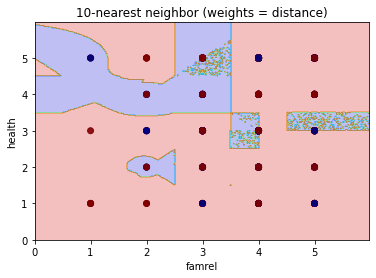

In [53]:
from matplotlib import cm

h = 0.02

knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn.fit(X, y)

#設定圖的範圍
x_min, x_max = X.iloc[:,0].min() - 1, X.iloc[:,0].max() + 1
y_min, y_max = X.iloc[:,1].min() - 1, X.iloc[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

#畫出decision的區塊
Z = Z.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.25, cmap=cm.jet)

#將training data標出來
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, alpha=0.9, cmap=cm.jet)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("10-nearest neighbor (weights = distance)")
plt.xlabel("famrel")
plt.ylabel("health")
plt.show()

##### 若X_test落在某顏色範圍，則y_pred的結果就會是那個顏色代表的值

### Show the prediction and reasoning of 1-samples in the validation set.

#### 用trained model預測出來y_pred

In [54]:
knn2.fit(pass_X_train, pass_y_train)
pass_y_pred = knn2.predict(pass_X_test)

#### 以test data中的第0筆資料為例

In [55]:
pass_X_test_data = pass_X_test.iloc[0,:]

#### 用DistanceMetric中的function算出X_test的第0個data和X_train所有點的距離，並將他們sort後取出第0筆到第4筆，再取那5筆資料在array中的index，以便找到對應的y_pred

In [56]:
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('euclidean')

distance = []

for i in range(len(pass_X_train)):
    cpr = [pass_X_test_data, pass_X_train.iloc[i]]
    arr = dist.pairwise(cpr)
    distance += [arr[0][1]]
# print(distance)

sorted_dst = sorted(distance)[:5]
sorted_idx = sorted(range(len(distance)), key=lambda k: distance[k])[:5]

print(sorted_dst)
print(sorted_idx)

[4.69041575982343, 4.795831523312719, 4.898979485566356, 4.898979485566356, 5.0]
[57, 127, 5, 117, 268]


#### 因為y本來是dataframe有自己的index，為了能對應x array中的資料，所以將它改為numpy array，然後用上面算出的x array 5個最近data資料的index找到他們target的結果。

In [57]:
pass_y_train_arr = pass_y_train.to_numpy()
print(pass_y_train_arr[sorted_idx])

[1 1 1 1 1]


#### 預測結果 & 真實結果

In [58]:
print('prediction result: ', pass_y_pred[0])

prediction result:  1


In [59]:
print('real result: ', pass_y_test.iloc[0])

real result:  1
